<a href="https://colab.research.google.com/github/priya1207/TSF-TASKS/blob/main/TSF_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation - Data Science & Business Analytics Internship

# TASK 2 - Prediction using Unsupervised ML

## AUTHOR : HARIPRIYA.S

### In this K-means clustering task  we need to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

# STEP-1 IMPORT THE DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [5]:
df = pd.read_csv('/content/Iris.csv')
df.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#STEP-2 VISUALIZE THE DATA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


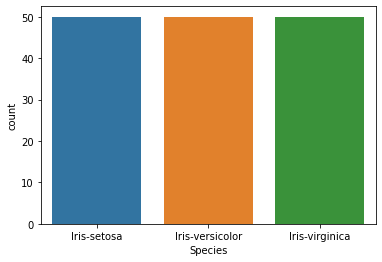

In [6]:
sns.countplot(df['Species'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


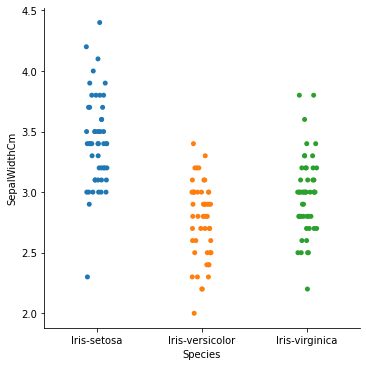

In [7]:
sns.catplot("Species", "SepalWidthCm", data = df)

#STEP-3 ELBOW METHOD FOR OPTIMUM NUMBERS

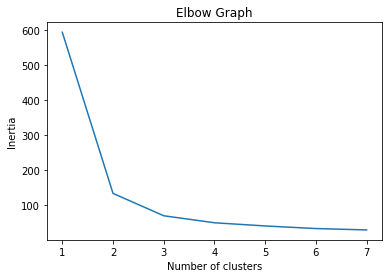

In [10]:
x = df.iloc[:, [1, 2, 3]].values
inertias = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 8), inertias)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# STEP-4 K-MEANS CLUSTER

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [12]:
labels = kmeans.predict(x)

#STEP-5 VISUALIZING THE CLUSTERS

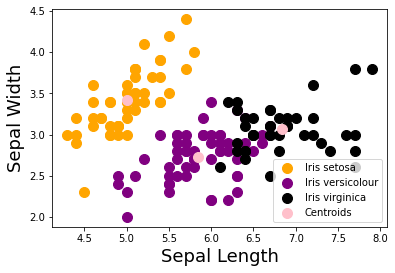

In [17]:
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'orange', label = 'Iris setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'purple', label = 'Iris versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'black', label = 'Iris virginica')
plt.xlabel('Sepal Length', fontsize =18)
plt.ylabel('Sepal Width', fontsize =18)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'pink', label = 'Centroids')

plt.legend()